# Whatsapp chat analysis

This analysis aims to gets some summary statistics from a Whatsapp conversation. The chat from which the data was taken is conversation between MBA students. The questions that I what to answer with this analysis:

1 - Which is the day of week in which people talk the most?

2 - Which is the hour of the day in which people talk the most?

3 - Which is the hour of the day in which people talk the least?

4 - Which are the most used words?

## Importing libraries

In [1]:
import pandas as pd
import datetime
import seaborn as sns
from collections import Counter

sns.set_style('darkgrid')

## Data preparation

In [2]:
date = []
user = []
message = []
date_errors = []
whats_automatic_message = []

text_file = open("conversa.txt", encoding='utf-8')
line=text_file.readline()

for line in text_file:
    line = text_file.readline()
    try:
        aux_date = datetime.datetime.strptime(line[0:16], '%d/%m/%Y %H:%M')
        aux_user = line[19:].split(': ',1)[0]
        aux_message = line.split(': ',1)[1]
        
        date.append(aux_date)
        user.append(aux_user)
        message.append(aux_message)
        
    except ValueError:
        date_errors.append(line)
    except IndexError:
        whats_automatic_message.append(line)

d = {'date': date, 'user': user, 'message': message}
df = pd.DataFrame(data = d)
df

,date,user,message
0,2020-04-23 21:35:00,+55 11 99286-6200,https://www.hackerrank.com/ https://www.kaggl...
1,2020-04-23 21:36:00,+55 11 95656-2261,👍🏼\n
2,2020-04-23 21:38:00,+55 11 95906-2900,Valeu 😀\n
3,2020-04-23 21:39:00,+55 11 94564-7581,https://datahackers.com.br\n
4,2020-04-23 21:39:00,+55 11 94564-7581,Sigo eles no slack tbm\n
...,...,...,...
1173,2020-08-24 14:19:00,+55 13 98177-7778,O que não quero é que use bibliotecas para ler...
1174,2020-08-24 14:19:00,+55 13 98177-7778,Pra contar as palavras tb\n
1175,2020-08-24 20:31:00,+55 11 94564-7581,@5513981777778 Consegui fazer os dois exercici...
1176,2020-08-24 20:33:00,+55 13 98177-7778,Possivelmente o arquivo\n


## 1 - Which is the day of week in which people talk the most?

Monday=0, Sunday=6. The day of week in which people talk the most is Thursday (3).

In [3]:
df['DoW'] = df.date.dt.dayofweek.astype('category')
df['DoW'].describe()

count     1178
unique       7
top          3
freq       364
Name: DoW, dtype: int64

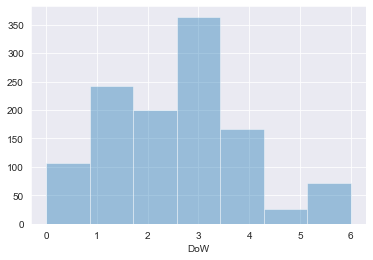

In [4]:
sns.distplot(df['DoW'], kde=False, bins=7)

## 2 and 3 - Which is the hour of the day in which people talk the most (least)?

The hour in which people talk the most is 7 p.m. (when class starts). 2 a.m is the hour in which people talk the least.

In [5]:
df['hour'] = df.date.dt.hour.astype('category')
df['hour'].value_counts()

19    165
20    131
12    125
14     86
23     82
15     76
18     73
17     67
22     66
11     59
16     55
21     45
10     43
13     33
0      24
8      18
9      17
7       8
1       4
2       1
Name: hour, dtype: int64

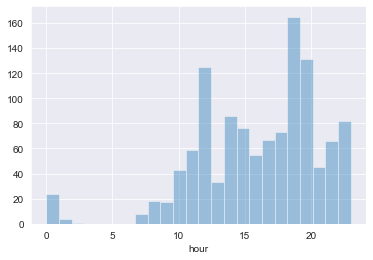

In [6]:
sns.distplot(df['hour'], kde=False, bins = 24)

## 4 - Which are the most used words?

In [11]:
df.message = df.message.str.lower().str.replace('\n', ' ')
df2 = pd.DataFrame(
            df.message.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
            ).reset_index()

df2.columns = ['message_word', 'count_occurrences']
df2['message_word'] = df2['message_word'].str.strip('.').str.strip('!').str.strip('""').str.strip("''").str.strip('(').str.strip(')')
df2 = df2.groupby('message_word').sum().sort_values(by = ['count_occurrences'], ascending=False).head(50)
df2


,count_occurrences
message_word,
,1222.0
de,281.0
o,210.0
que,163.0
e,154.0
a,146.0
mídia,112.0
<arquivo,112.0
oculto>,112.0
